# Machine Learning Project : ReneWind(Introduction to neural network)

### Problem Statement

**Business Context**

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.
Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S. Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.
Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable, and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.
The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

**Objective**

"ReneWind" is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data on generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). The dataset includes 40 predictors, 20,000 observations in the training set, and 5,000 in the test set.
The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators can be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:
- True Positives (TP) are failures correctly predicted by the model. These will result in repair costs.
- False Negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False Positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

"1" in the target variable should be considered as "failure," and "0" represents "No failure."

**Data Dictionary**

The data provided is a transformed version of the original data which was collected using sensors.
- Train.csv – To be used for training and tuning of models.
- Test.csv – To be used only for testing the performance of the final best model.

Both datasets consist of 40 predictor variables and 1 target variable.

**Installing the libraries**

In [5]:
# Installing the necessary libraries
!pip install tensorflow -q

In [6]:
!pip install imblearn -q

**Importing the Libararies**

In [8]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as kr
from keras.layers import Dense, Input
from keras.models import Sequential
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from keras.backend import clear_session as cls
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
from sklearn.impute import SimpleImputer
import time
from keras.layers import BatchNormalization,Dropout
from sklearn.metrics import classification_report

**Setting random seed for all operations**

In [10]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
kr.utils.set_random_seed(123)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

**Loading Train dataset**

In [12]:
# loading the train dataset
data=pd.read_csv('Train.csv')

In [13]:
# making the copy of training data
datra=data.copy()

**First 5 rows of the Train Dataset**

In [15]:
datra.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [16]:
datra.shape

(20000, 41)

**Observation:**
- There are 20000 rows and 41 columns in Training dataset. 

In [18]:
datra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

**Observations:**
- There 40 columns of Float dataype and 1 columns with Int datatype which is the `Target`.
- There are 18 Null values present in both `V1`&`V2` columns.

In [20]:
datra.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

**Observations:**
- The 18 Null values present in both `V1`&`V2` columns would treated during Data Preprocessing.

In [22]:
datra.duplicated().sum()

0

**Observations:**
- There are Zero duplicates in the data.

In [24]:
datra.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000000,19982.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.271996,0.440430,2.484699,-0.083152,-0.053752,-0.995443,-0.879325,-0.548195,-0.016808,-0.012998,...,0.303799,0.049825,-0.462702,2.229620,1.514809,0.011316,-0.344025,0.890653,-0.875630,0.055500
std,3.441625,3.150784,3.388963,3.431595,2.104801,2.040970,1.761626,3.295756,2.160568,2.193201,...,5.500400,3.575285,3.183841,2.937102,3.800860,1.788165,3.948147,1.753054,3.012155,0.228959
min,-11.876451,-12.319951,-10.708139,-15.082052,-8.603361,-10.227147,-7.949681,-15.657561,-8.596313,-9.853957,...,-19.876502,-16.898353,-17.985094,-15.349803,-14.833178,-5.478350,-17.375002,-6.438880,-11.023935,0.000000
25%,-2.737146,-1.640674,0.206860,-2.347660,-1.535607,-2.347238,-2.030926,-2.642665,-1.494973,-1.411212,...,-3.420469,-2.242857,-2.136984,0.336191,-0.943809,-1.255819,-2.987638,-0.272250,-2.940193,0.000000
50%,-0.747917,0.471536,2.255786,-0.135241,-0.101952,-1.000515,-0.917179,-0.389085,-0.067597,0.100973,...,0.052073,-0.066249,-0.255008,2.098633,1.566526,-0.128435,-0.316849,0.919261,-0.920806,0.000000
75%,1.840112,2.543967,4.566165,2.130615,1.340480,0.380330,0.223695,1.722965,1.409203,1.477045,...,3.761722,2.255134,1.436935,4.064358,3.983939,1.175533,2.279399,2.057540,1.119897,0.000000
max,15.493002,13.089269,17.090919,13.236381,8.133797,6.975847,8.006091,11.679495,8.137580,8.108472,...,23.633187,16.692486,14.358213,15.291065,19.329576,7.467006,15.289923,7.759877,10.654265,1.000000


**Observations:**
- The sensory values range from negative to positive.
- Inferences cannot be made without knowing what these values or columns signify.

In [26]:
datra.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'Target'],
      dtype='object')

**Loading test Dataset**

In [28]:
dataes=pd.read_csv('Test.csv')

In [29]:
dataes.shape

(5000, 41)

**Observation:**
- There are 5000 rows and 41 columns in the test data set.

In [31]:
dataes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

**Observations:**
- There 40 columns of Float dataype and 1 columns with Int datatype which is the `Target`, which aligns with the Trainning dataset.
- There are 5 & 6 Null values present in `V1`&`V2` columns respectively, which would be treated during Data Preprocessing.
- And Since Test Data represent the Unseen Data only data checks are done to it like missing value Treatment.


### **Univariate Analysis**

In [34]:
cols=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
        'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
        'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
        'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
        'Target']

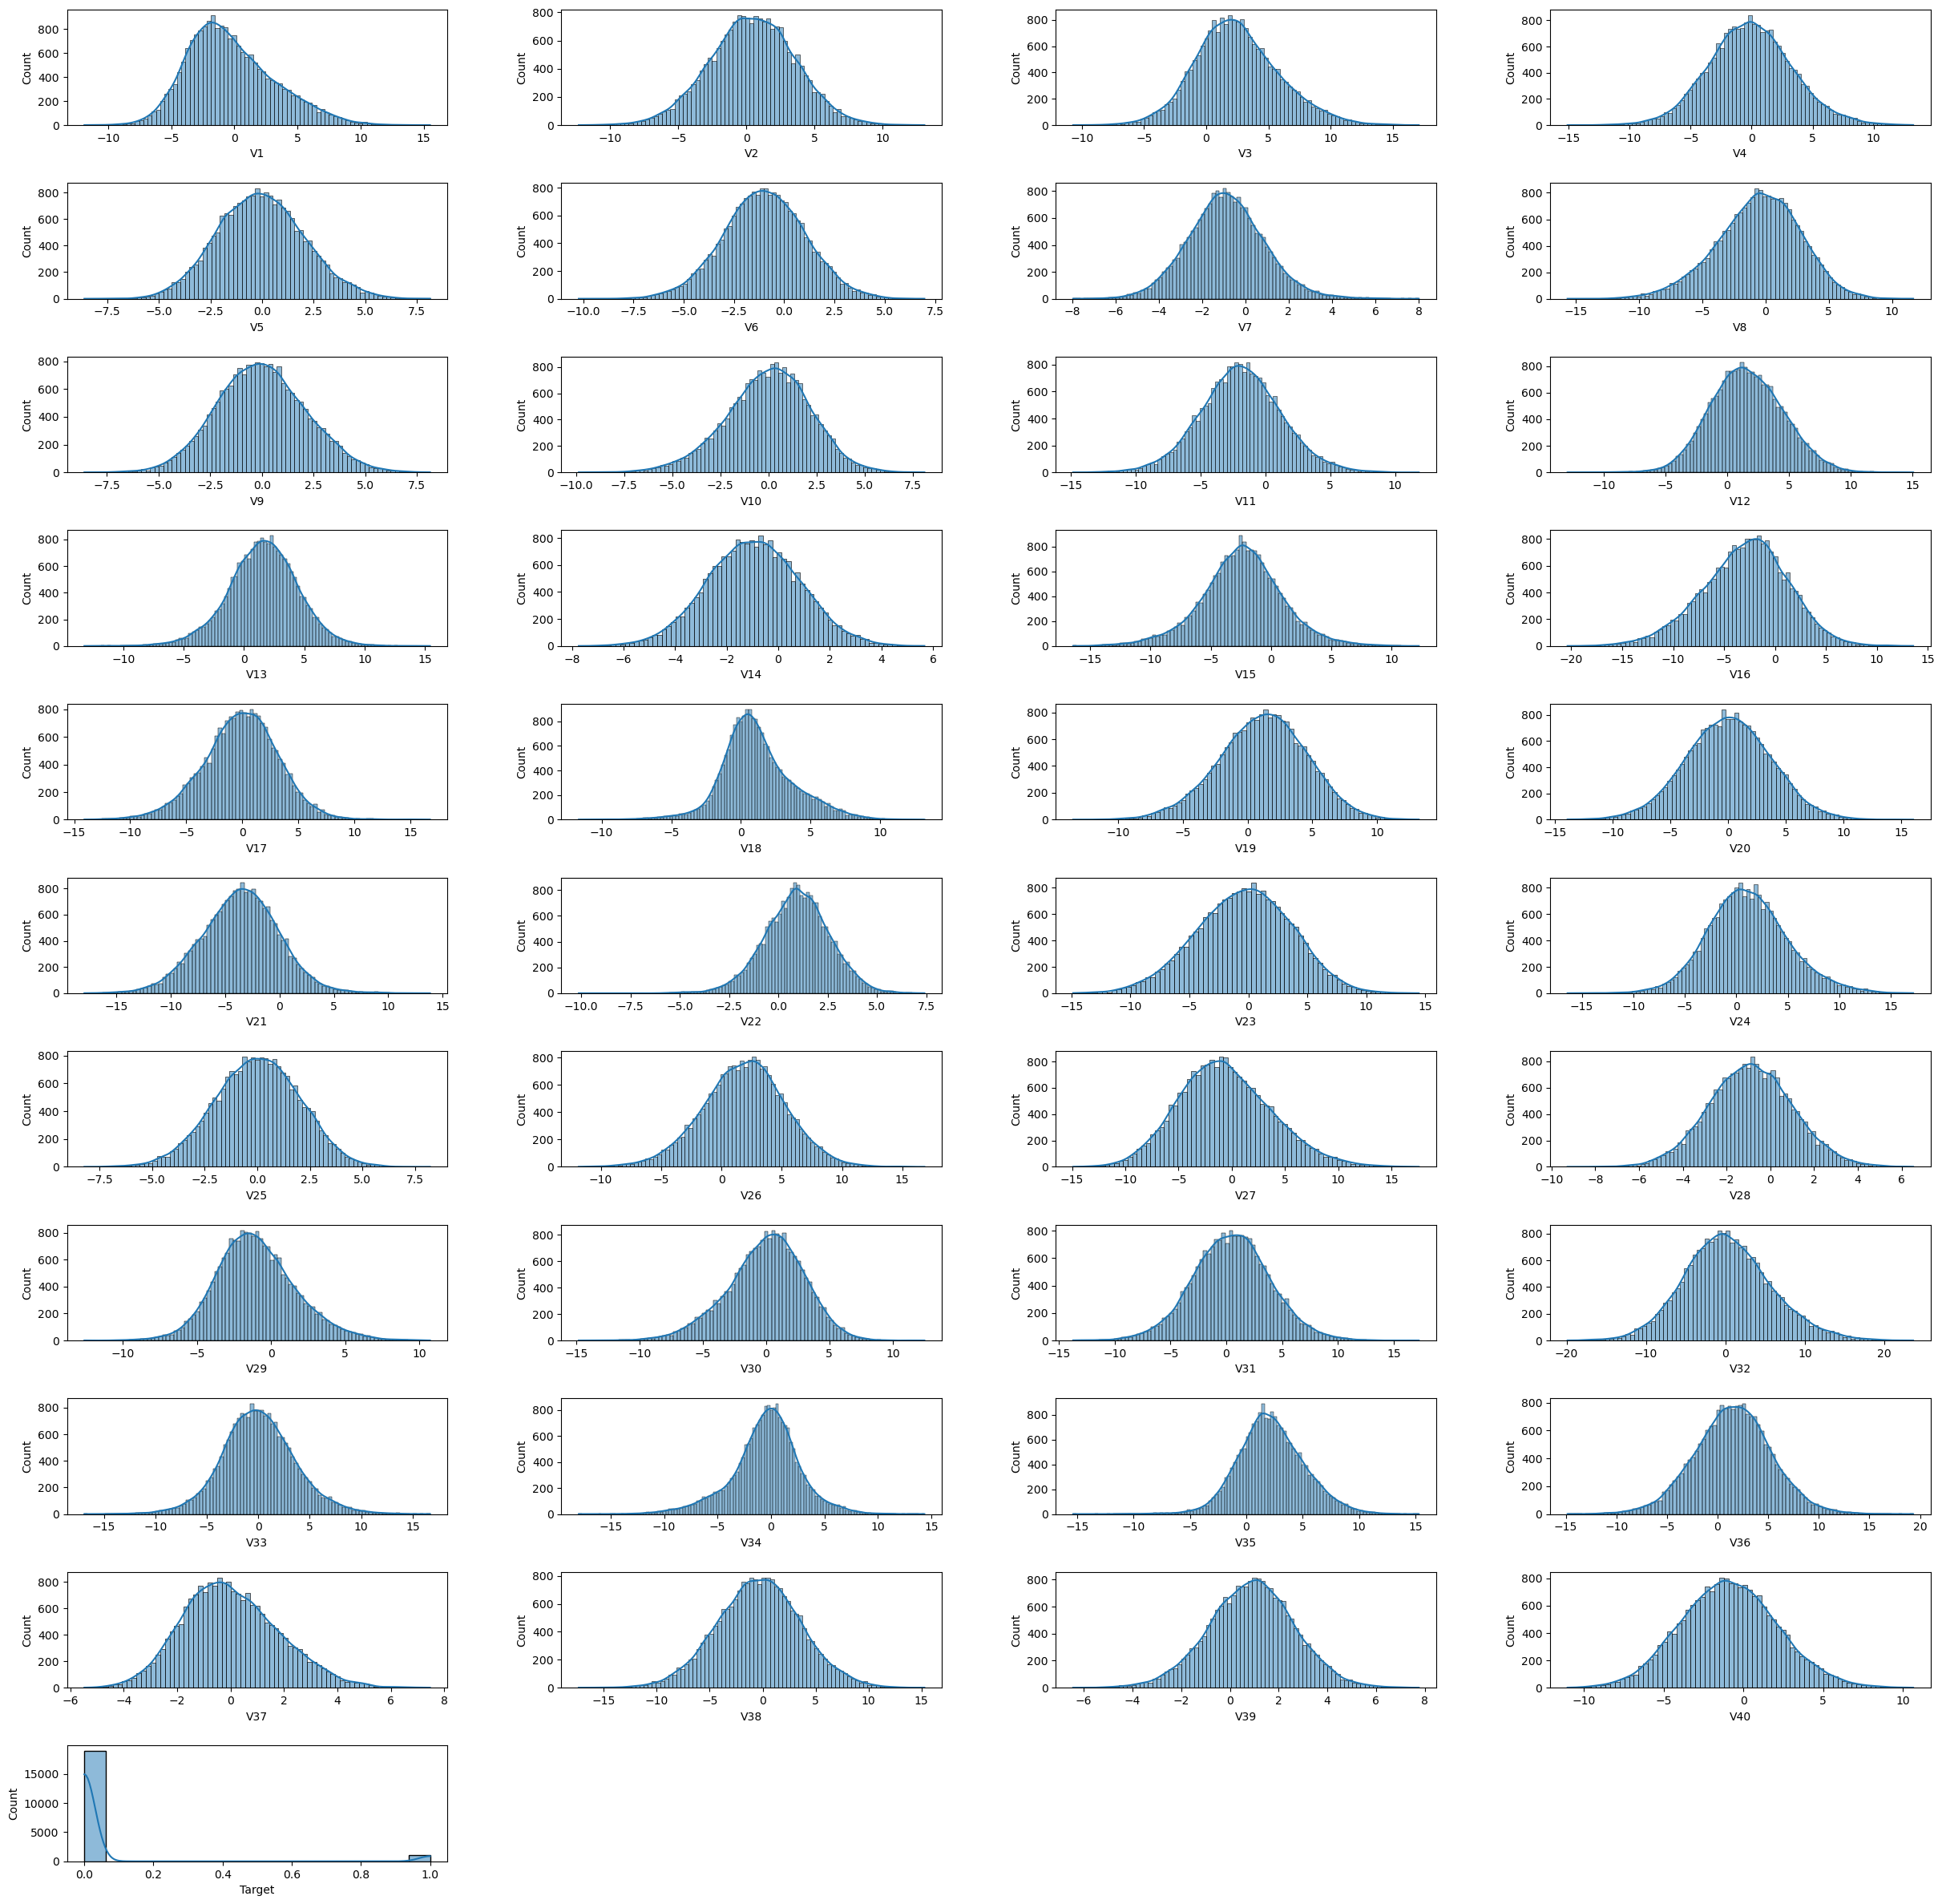

In [35]:
fx,ax=plt.subplots(11,4,figsize=(30,30))
ax=ax.flatten()
for i,j in enumerate(cols):
    sns.histplot(datra,x=j,ax=ax[i],kde=True)
    ax[i].set_xlabel(j)
for i in range(len(cols),len(ax)):
    fx.delaxes(ax[i])
    
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

**Observations:**
- Almost all the of the **`sensory data`** have **no skew or with slight skew towards left or right**.
- which also implies that the **Mean** and **Median** are **almost same or with minor difference** in all of **`sensory data`**.
- The **`Target`** column have **big imbalance**.

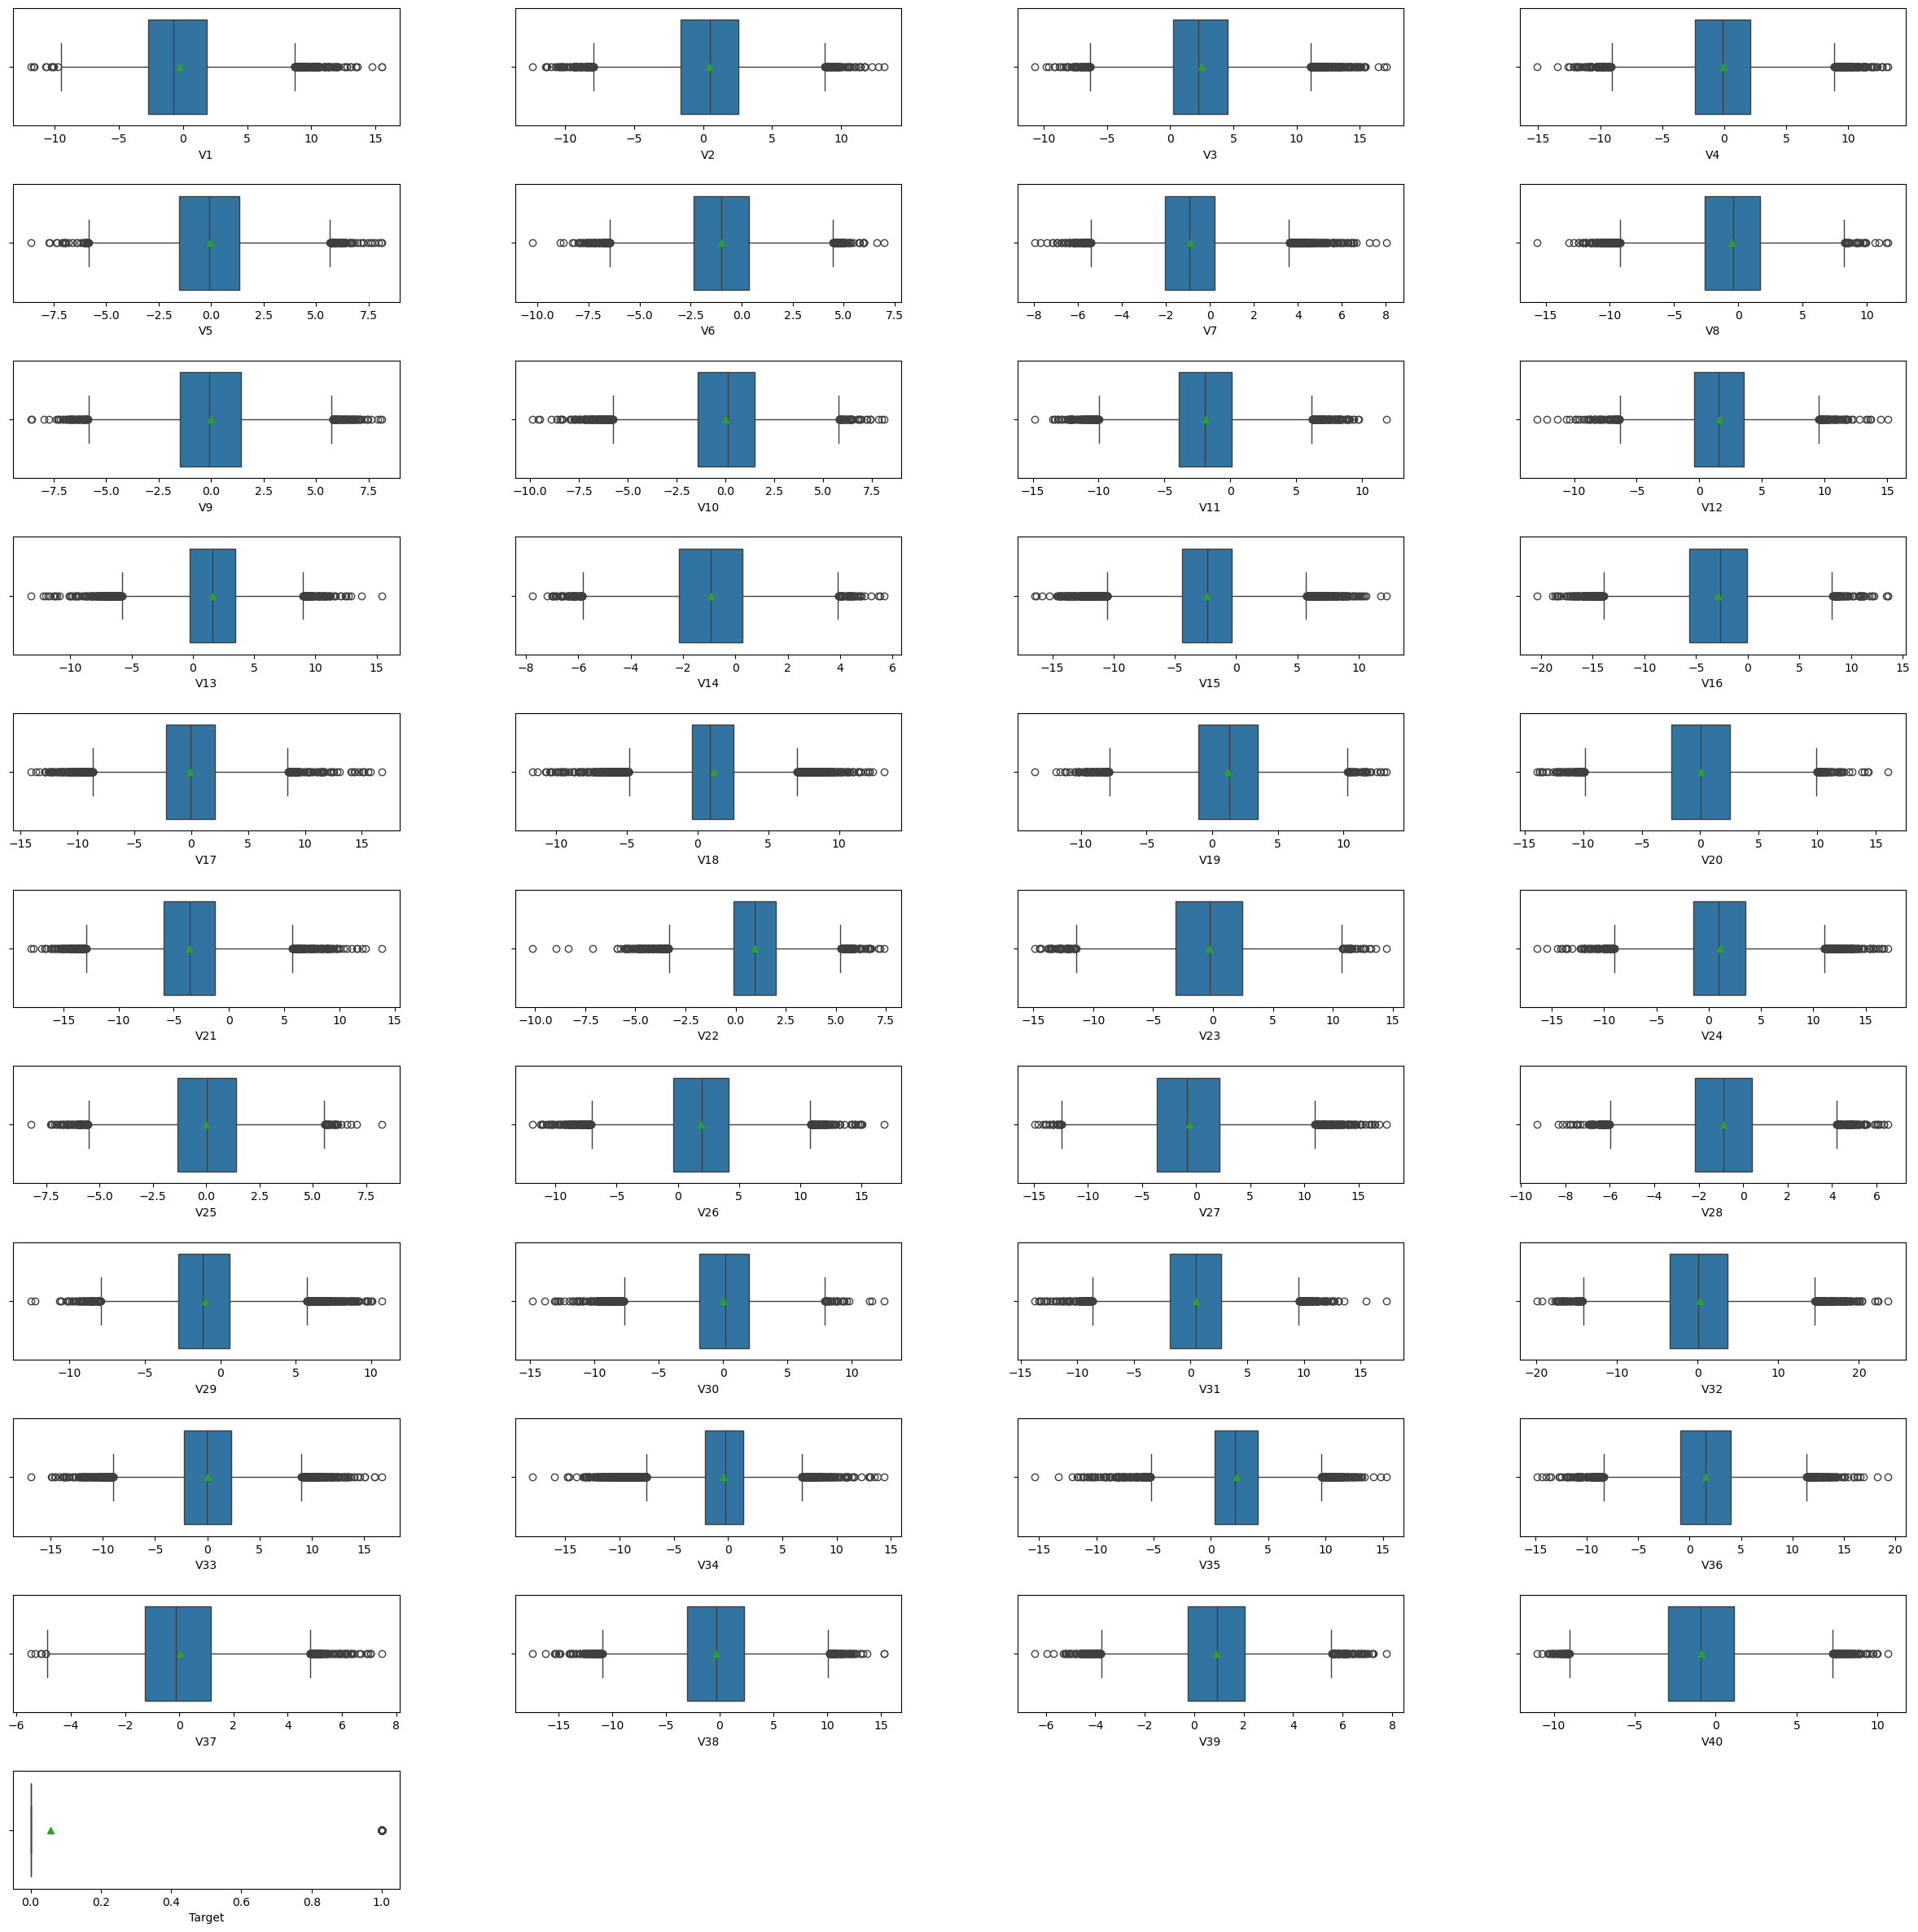

In [37]:
fx,ax=plt.subplots(11,4,figsize=(30,30))
ax=ax.flatten()
for i,j in enumerate(cols):
    sns.boxplot(datra,x=j,ax=ax[i],showmeans=True)
    ax[i].set_xlabel(j)
for i in range(len(cols),len(ax)):
    fx.delaxes(ax[i])
    
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

**Observations:**
- All the **`Sensory data`** have **outliers** in them which **cannot be treated without knowing their significance**.
- Almost all the of the **`sensory data`** have **no skew or with slight skew towards left or right**.
- The Boxplot shows that the **Mean** and **Median** are **almost same or with minor difference** in all of **`sensory data`**.
- The **`Target`** column have **big imbalance**.


**Target**

In [40]:
datra['Target'].value_counts(normalize=True)

Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64

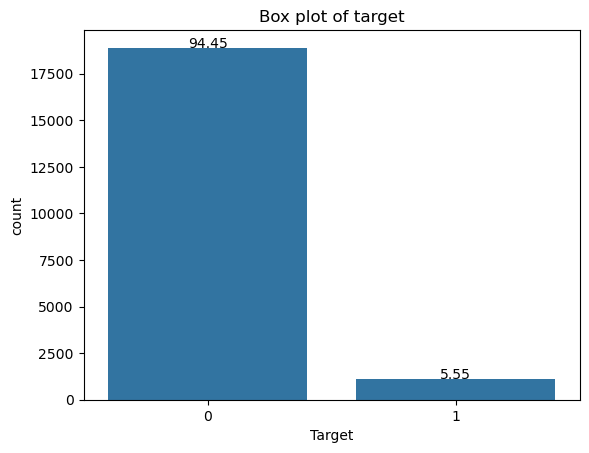

In [41]:
# target
total=len(datra)
a=sns.countplot(data=datra,x='Target')
for i in a.patches:
    per=(i.get_height()/total)*100
    a.text(i.get_x()+i.get_width()/2,i.get_height()+2,per,ha='center',fontsize=10)
plt.title('Box plot of target')
plt.show()

**Observation:**
- The **`Target`** column have a very big imbalace of approx (95:5) with only about a 6% showing one of the outcome.
- This Imbalance would be treated during data preprocessing.

### Bivariate analysis

**Data W.R.T `Target`**

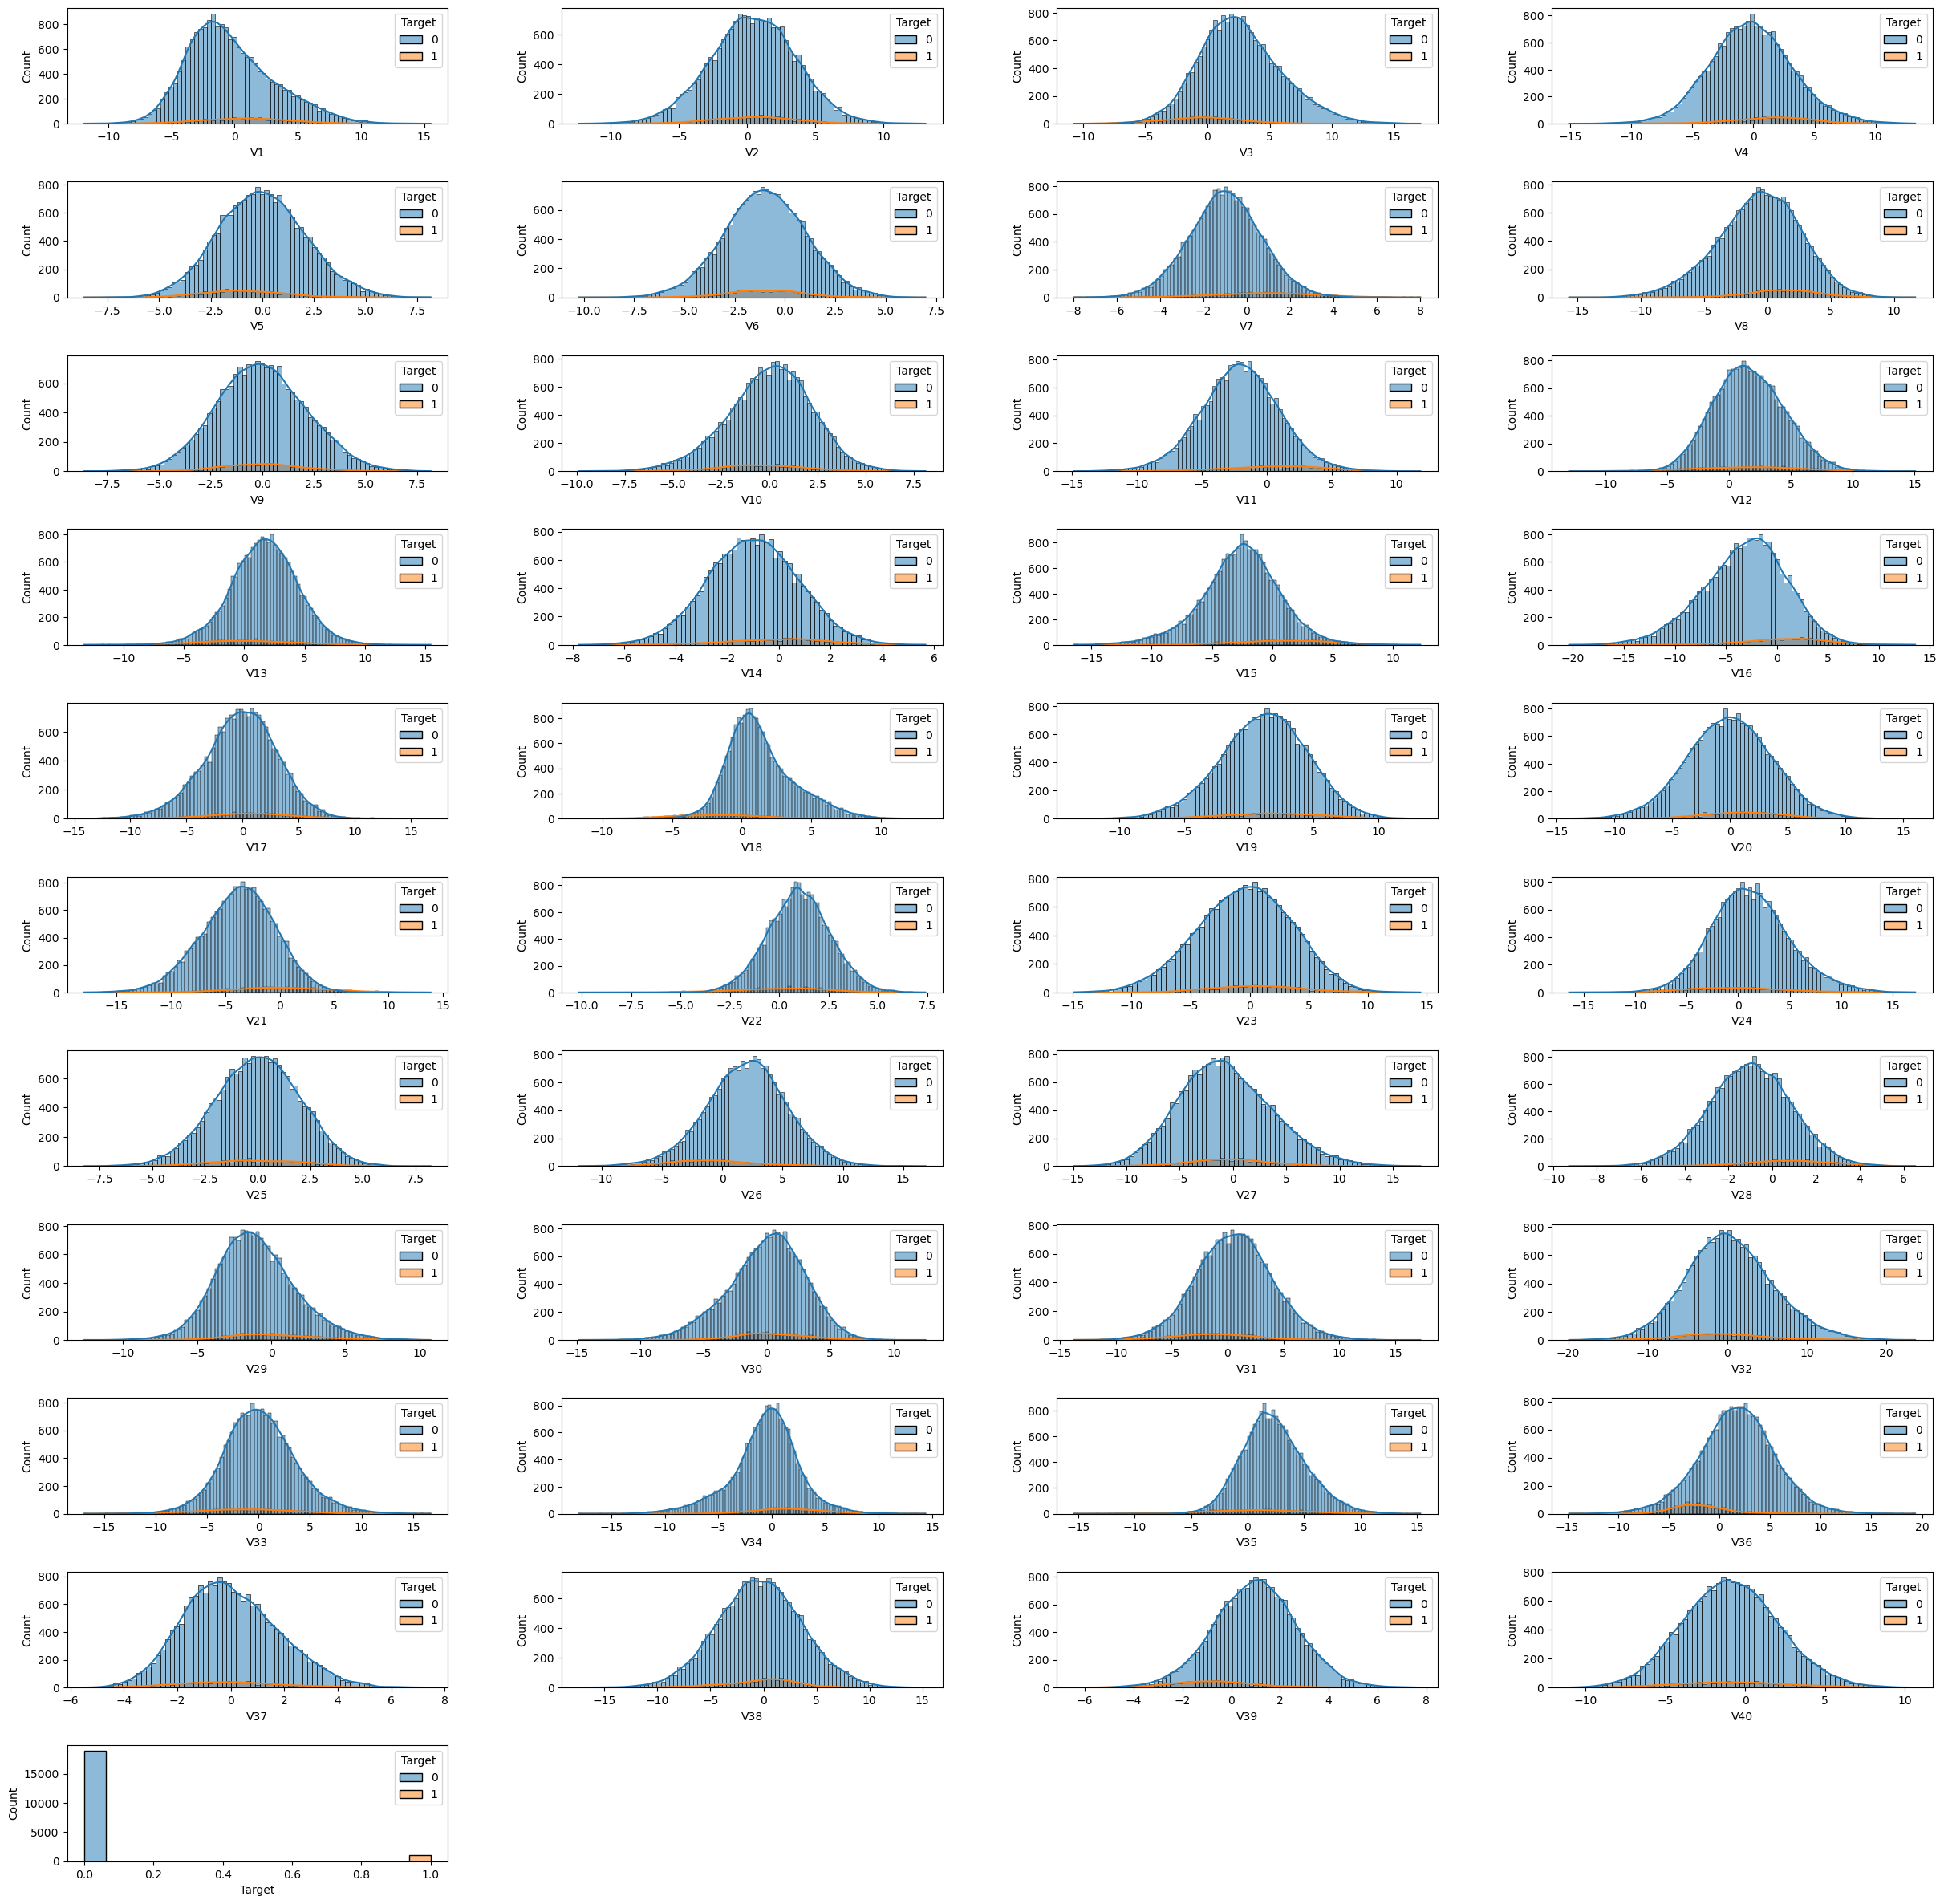

In [45]:
fx,ax=plt.subplots(11,4,figsize=(30,30))
ax=ax.flatten()
for i,j in enumerate(cols):
    sns.histplot(datra,x=j,ax=ax[i],kde=True,hue='Target')
    ax[i].set_xlabel(j)
for i in range(len(cols),len(ax)):
    fx.delaxes(ax[i])
    
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

### Summary of EDA and Observations

1. **Skewness in Sensory Data**:
   - The sensory data exhibits negligible to small skewness with respect to the **Target** variable.
   - As a result, the mean and median are nearly identical, indicating a fairly symmetric distribution.

2. **Handling Outliers**:
   - Since the sensory data is in a ciphered format, its underlying meaning is not known. Consequently, outliers are treated as valid data points, as they may represent genuine trends within the dataset.

3. **Further Inferences**:
   - Due to the lack of deciphered context or understanding of the sensory data, it is not possible to derive more meaningful inferences at this stage.


## Data Pre-Processesing

**1. data splitting**

In [49]:
#splitting training data
x=datra.drop('Target',axis=1)
y=datra['Target']

In [50]:
# splitting into training and validation
x_train,x_val,y_train,y_val=tts(x,y, test_size=0.25,stratify=y,random_state=1)

In [51]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((15000, 40), (5000, 40), (15000,), (5000,))

In [52]:
#splitting test data into  x and y
x_test=dataes.drop('Target',axis=1)
y_test=dataes['Target']

In [53]:
x_test.shape,y_test.shape

((5000, 40), (5000,))

**2. Imputing Median for null values**

In [55]:
sim=SimpleImputer(strategy='median')
simd=sim.fit(x_train)

In [56]:
# Imputing without Data-Leakage
x_train[['V1','V2']]=simd.fit_transform(x_train[['V1','V2']])
x_val[['V1','V2']]=simd.transform(x_val[['V1','V2']])
x_test[['V1','V2']]=simd.transform(x_test[['V1','V2']])


**3. Balancing the dataset using smote**

In [58]:
sm=SMOTE(sampling_strategy=1,random_state=1)
x_over,y_over=sm.fit_resample(x_train,y_train)

In [59]:
y_train.value_counts(),x_train.shape

(Target
 0    14168
 1      832
 Name: count, dtype: int64,
 (15000, 40))

In [60]:
y_over.value_counts(),x_over.shape

(Target
 0    14168
 1    14168
 Name: count, dtype: int64,
 (28336, 40))

## Model building

### Evaluation Metric: Recall

#### Why Recall?

In this problem, the focus is on predicting failures in machines to minimize operational and maintenance costs. **Recall** is chosen as the evaluation metric because:

1. **Impact of Missed Failures**:
   - A missed failure (False Negative) means that a failing machine goes undetected, potentially leading to costly breakdowns or high replacement costs.
   - Detecting a failure (True Positive) allows for timely repairs, which are significantly less expensive than handling breakdowns or replacements.

2. **Cost Sensitivity**:
   - The cost associated with a missed failure (False Negative) is much higher than the cost of unnecessary checks or inspections (False Positives).
   - Since recall prioritizes capturing all actual failures, it directly minimizes the risk of False Negatives, reducing replacement and overall operational costs.

3. **Metric Alignment with Objectives**:
   - Recall measures the proportion of actual failures that the model successfully identifies.
   - A high recall ensures that most failures are detected, achieving the primary goal of avoiding expensive breakdowns and replacements.

4. **Balancing Trade-offs**:
   - While precision (minimizing unnecessary inspections) is also important, the consequences of missing a failure are more severe than conducting additional inspections.
   - Therefore, recall takes precedence to ensure failures are not overlooked.

### Conclusion

In scenarios where the cost of missing a failure outweighs the cost of false alarms, particularly due to high replacement costs, **recall** becomes the critical metric. Optimizing for recall ensures that failures are detected and addressed, significantly reducing the financial and operational impact of undetected failures.


**Model evaluation functions**

In [64]:
def mod_eval(model,x,y,t=0.5):
    pred=model.predict(x)>t
    a=accuracy_score(y,pred)
    p=precision_score(y,pred)
    r=recall_score(y,pred)
    f1=f1_score(y,pred)
    df=pd.DataFrame({'Accuracy':a,'precision':p,'recall':r,'f1_score':f1},index=[0])
    return df

In [65]:
def plot(model,name):
    plt.figure(figsize=(5,5))
    plt.plot(model.history[name])
    plt.plot(model.history['val_'+name])
    plt.title(f'Model: '+name)
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend(['Train','Validation'])
    plt.show()

**Model 0: with unsampled data**

In [67]:
#clearing previous keras session
cls()

In [68]:
#building NN model sequentially using unsampled data
M0= Sequential()
M0.add(Input(shape=(x_train.shape[1],)))
M0.add(Dense(14,activation='relu'))
M0.add(Dense(7,activation='relu'))
M0.add(Dense(1,activation='sigmoid'))

In [69]:
M0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             574 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
#Optimizer as stochastic gradient Descent
Op0=kr.optimizers.SGD()
M0.compile(optimizer=Op0,loss='binary_crossentropy')

In [71]:
#Fitting the model with 64 batches and 24 epochs
start=time.time()
H1=M0.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=64,epochs=24)
end=time.time()

Epoch 1/24
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4973 - val_loss: 0.1913
Epoch 2/24
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1739 - val_loss: 0.1466
Epoch 3/24
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1363 - val_loss: 0.1264
Epoch 4/24
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1175 - val_loss: 0.1148
Epoch 5/24
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1057 - val_loss: 0.1075
Epoch 6/24
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0979 - val_loss: 0.1025
Epoch 7/24
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0921 - val_loss: 0.0989
Epoch 8/24
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0878 - val_loss: 0.0959
Epoch 9/24
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0842 - val_loss: 0.0934
Epoch 10/24
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0811 - val_loss: 0.0910
Epoch 11/24
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0781 - val_loss: 0.0889
Epoch 12/24
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [72]:
print('Time Taken:',end-start)

Time Taken: 20.838632106781006


In [73]:
#model Evaluation on training data 
M0tr=mod_eval(M0,x_train,y_train)
M0tr

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,precision,recall,f1_score
0,0.987467,0.961318,0.80649,0.877124


In [74]:
#model evaluation on test data
M0te=mod_eval(M0,x_val,y_val)
M0te

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


,Accuracy,precision,recall,f1_score
0,0.9852,0.943478,0.780576,0.854331


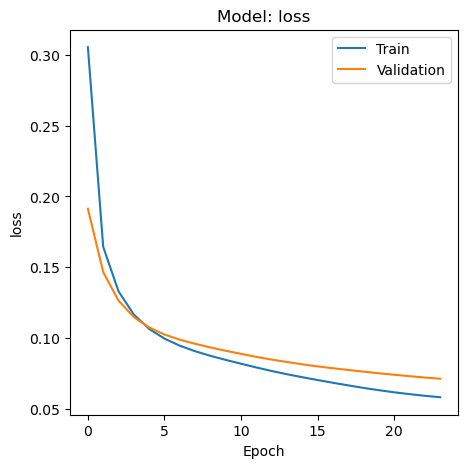

In [75]:
#Loss graph of the model
plot(H1,'loss')

### **Summary & Observation of using Unsampled data:**

- **Model Performance**: The model's performance appears good based on the metrics evaluated.
- **Class Imbalance**: Only **5-6%** of the data represents defective machines, leading to a significant imbalance in the dataset.
- **Evaluation Concern**: The current metrics may not accurately reflect the true performance due to this imbalance, as the model could achieve deceptively high scores by favoring the majority class (non-defective machines) while overlooking defective machines.
- **Oversampling Strategy**:
  - **Oversampling** of the minority class is employed to address the imbalance.
  - **Undersampling** is avoided, as it would result in the removal of approximately **95% of the data**, leading to underfitting and significant information loss.
- **Training Data**: Only the **oversampled dataset** will be used for training to ensure the model learns effectively from the minority class.


**Model 1: With Over sampled data**

In [78]:
#clearing previous keras session
cls()

In [79]:
#building NN model sequentially using oversampled data
M1=Sequential()
M1.add(Input(shape=(x_over.shape[1],)))
M1.add(Dense(14,activation='relu'))
M1.add(Dense(7,activation='relu'))
M1.add(Dense(1,activation='sigmoid'))

In [80]:
M1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             574 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
#Optimizer as stochastic gradient Descent
Op1=kr.optimizers.SGD()
M1.compile(loss='binary_crossentropy',optimizer=Op1)

In [82]:
#Fitting the model with 64 batches and 24 epochs
st=time.time()
h2=M1.fit(x_over,y_over,validation_data=(x_val,y_val),batch_size=64,epochs=24)
en=time.time()

Epoch 1/24
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6173 - val_loss: 0.2974
Epoch 2/24
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2780 - val_loss: 0.2177
Epoch 3/24
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2274 - val_loss: 0.1900
Epoch 4/24
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2021 - val_loss: 0.1732
Epoch 5/24
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1863 - val_loss: 0.1610
Epoch 6/24
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1756 - val_loss: 0.1514
Epoch 7/24
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1677 - val_loss: 0.1445
Epoch 8/24
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1615 - val_loss: 0.1398
Epoch 9/24
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1567 - val_loss: 0.1359
Epoch 10/24
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1527 - val_loss: 0.1330
Epoch 11/24
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1494 - val_loss: 0.1302
Epoch 12/24
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [83]:
print('Time taken:',en-st)

Time taken: 31.650057792663574


In [84]:
M1tr=mod_eval(M1,x_over,y_over)
M1tr

886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,precision,recall,f1_score
0,0.958216,0.987241,0.92843,0.956933


In [85]:
M1ts=mod_eval(M1,x_val,y_val)
M1ts

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,precision,recall,f1_score
0,0.9816,0.812081,0.870504,0.840278


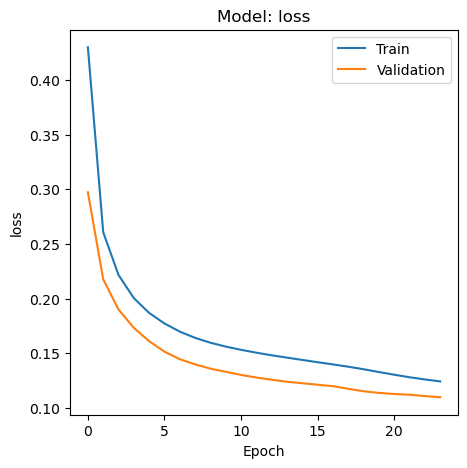

In [86]:
plot(h2,'loss')

**Observations:**
- The recall in the validation is better than the unsampled data.
- The performance in training better than validation.
- while differences(train & validation) are bit high which shows over-fitting. 

**Model: 2 with sgd with momentum as optimiser & changing no of neurons,epoch,batch sizes**

In [89]:
#clearing previous keras session
cls()

In [90]:
#building NN model sequentially 
M2=Sequential()
M2.add(Input(shape=(x_over.shape[1],)))
M2.add(Dense(16,activation='relu'))
M2.add(Dense(8,activation='relu'))
M2.add(Dense(1,activation='sigmoid'))

In [91]:
M2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
#Optimizer as stochastic gradient Descent with momentum of 0.9
Op2=kr.optimizers.SGD(momentum=0.9)
M2.compile(loss='binary_crossentropy',optimizer=Op2)

In [93]:
#Fitting the model with 32 batches and 32 epochs
st=time.time()
h3=M2.fit(x_over,y_over,validation_data=(x_val,y_val),batch_size=32,epochs=32)
en=time.time()

Epoch 1/32
886/886 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2458 - val_loss: 0.1176
Epoch 2/32
886/886 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1359 - val_loss: 0.1073
Epoch 3/32
886/886 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1243 - val_loss: 0.1011
Epoch 4/32
886/886 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1173 - val_loss: 0.1022
Epoch 5/32
886/886 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1138 - val_loss: 0.1016
Epoch 6/32
886/886 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1111 - val_loss: 0.1024
Epoch 7/32
886/886 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1086 - val_loss: 0.1049
Epoch 8/32
886/886 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 9/32
886/886 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1059 - val_loss: 0.0999
Epoch 10/32
886/886 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1042 - val_loss: 0.1108
Epoch 11/32
886/886 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1029 - val_loss: 0.1189
Epoch 12/32
886/886 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

In [94]:
print('time taken:',en-st)

time taken: 86.93938446044922


In [95]:
#model Evaluation on training data 
M2tr=mod_eval(M2,x_over,y_over)
M2tr

886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,precision,recall,f1_score
0,0.964533,0.977509,0.950946,0.964044


In [96]:
#model evaluation on test data
M2ts=mod_eval(M2,x_val,y_val)
M2ts

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,precision,recall,f1_score
0,0.972,0.69382,0.888489,0.77918


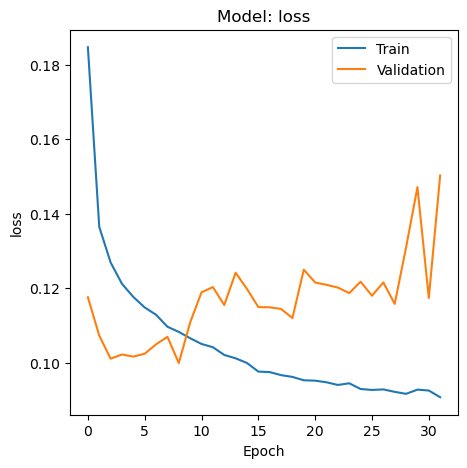

In [97]:
#Loss graph of the model
plot(h3,'loss')

**Observation:**
- The performance in train data is better that validation data.
- The difference(train & validation) became bigger showing overfitting.
- Loss in Validation set started low but increased so fast with so much oscillations.  

**Model 3 : adam as optimiser,different activations and other changes**

In [100]:
#clearing previous keras session
cls()

In [101]:
#building NN model sequentially
M3=Sequential()
M3.add(Input(shape=(x_over.shape[1],)))
M3.add(Dense(8,activation='relu'))
M3.add(Dense(16,activation='tanh'))
M3.add(Dense(32,activation='relu'))
M3.add(Dense(8,activation='tanh'))
M3.add(Dense(1,activation='sigmoid'))

In [102]:
M3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,289 (5.04 KB)

 Trainable params: 1,289 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
#Optimizer as Adam
Op3=kr.optimizers.Adam()
M3.compile(loss='binary_crossentropy',optimizer=Op3)

In [104]:
#Fitting the model with 64 batches and 32 epochs
St=time.time()
h4=M3.fit(x_over,y_over,validation_data=(x_val,y_val),epochs=32,batch_size=64)
en=time.time()

Epoch 1/32
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3941 - val_loss: 0.1194
Epoch 2/32
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1693 - val_loss: 0.1028
Epoch 3/32
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1489 - val_loss: 0.0961
Epoch 4/32
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1386 - val_loss: 0.0916
Epoch 5/32
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1327 - val_loss: 0.0883
Epoch 6/32
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1291 - val_loss: 0.0889
Epoch 7/32
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1252 - val_loss: 0.0929
Epoch 8/32
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1224 - val_loss: 0.0950
Epoch 9/32
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1199 - val_loss: 0.0938
Epoch 10/32
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1171 - val_loss: 0.0920
Epoch 11/32
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1145 - val_loss: 0.0916
Epoch 12/32
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [105]:
print('time taken',en-St)

time taken 50.61117744445801


In [106]:

#model Evaluation on training data 
M3tr=mod_eval(M3,x_over,y_over)
M3tr

886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,precision,recall,f1_score
0,0.965168,0.991425,0.938453,0.964212


In [107]:
#model evaluation on test data
M3ts=mod_eval(M3,x_val,y_val)
M3ts

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,precision,recall,f1_score
0,0.9836,0.840278,0.870504,0.855124


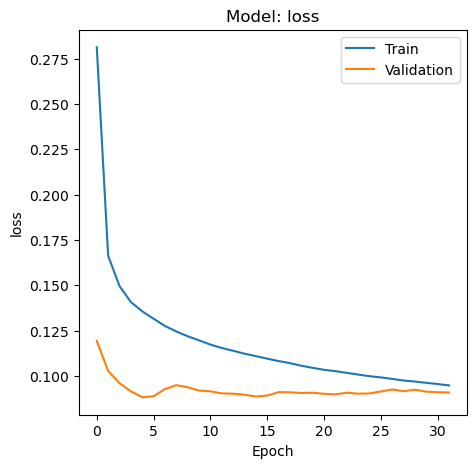

In [108]:
#Loss graph of the model
plot(h4,'loss')

**Observation:**
- The performance is better in training set, but the loss in validation is greatly reduced to the previous model with less oscillations.
- while difference(train & validation) is reduced still shows overfitting.

**Model 4 : Batch Normalisations, learning rate and other changes**

In [111]:
#clearing previous keras session
cls()

In [112]:
#building NN model sequentially 
M4=Sequential()
M4.add(Input(shape=(x_over.shape[1],)))
M4.add(Dense(16,activation='relu'))
M4.add(BatchNormalization())
M4.add(Dense(64,activation='relu'))
M4.add(BatchNormalization())
M4.add(Dense(32,activation='relu'))
M4.add(BatchNormalization())
M4.add(Dense(1,activation='sigmoid'))

In [113]:
M4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,305 (16.82 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 224 (896.00 B)

In [114]:
#Optimizer as Adam with learning rate 0.001
Op4=kr.optimizers.Adam(0.001)
M4.compile(loss='binary_crossentropy',optimizer=Op4)

In [115]:
#Fitting the model with 72 batches and 32 epochs
st=time.time()
h5=M4.fit(x_over,y_over,validation_data=(x_val,y_val),epochs=32,batch_size=72)
en=time.time()

Epoch 1/32
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3019 - val_loss: 0.1097
Epoch 2/32
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1366 - val_loss: 0.0901
Epoch 3/32
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1111 - val_loss: 0.0865
Epoch 4/32
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0984 - val_loss: 0.0863
Epoch 5/32
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0881 - val_loss: 0.0845
Epoch 6/32
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0807 - val_loss: 0.0779
Epoch 7/32
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0751 - val_loss: 0.0762
Epoch 8/32
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0704 - val_loss: 0.0725
Epoch 9/32
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0669 - val_loss: 0.0758
Epoch 10/32
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0635 - val_loss: 0.0745
Epoch 11/32
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0605 - val_loss: 0.0754
Epoch 12/32
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [116]:
print('time taken',en-st)

time taken 52.04052948951721


In [117]:
#model Evaluation on training data 
M4tr=mod_eval(M4,x_over,y_over)
M4tr

886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,precision,recall,f1_score
0,0.989695,0.988454,0.990966,0.989708


In [118]:
#model evaluation on test data
M4ts=mod_eval(M4,x_val,y_val)
M4ts

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,precision,recall,f1_score
0,0.976,0.739394,0.877698,0.802632


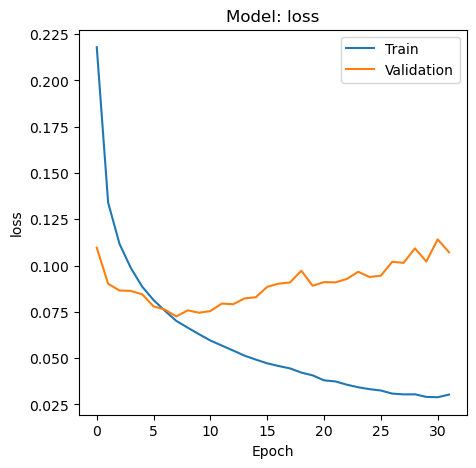

In [119]:
#Loss graph of the model
plot(h5,'loss')

**Observations:**
- The performance shows better in training than validation.
- Though recall scores and other metrics improved still difference(train & validation) is there.
- loss in validation became larger with more oscilations as compared to the previous model.

**Model 5 : dropouts and other changes**

In [122]:
#clearing previous keras session
cls()

In [123]:
#building NN model sequentially 
M5= Sequential()
M5.add(Input(shape=(x_over.shape[1],)))
M5.add(Dense(18,activation='relu'))
M5.add(BatchNormalization())
M5.add(Dropout(0.6))
M5.add(Dense(64,activation='relu'))
M5.add(BatchNormalization())
M5.add(Dropout(0.4))
M5.add(Dense(16,activation='relu'))
M5.add(BatchNormalization())
M5.add(Dropout(0.2))
M5.add(Dense(1,activation='sigmoid'))


In [124]:
M5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 18)                  │             738 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 18)                  │              72 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,403 (13.29 KB)

 Trainable params: 3,207 (12.53 KB)

 Non-trainable params: 196 (784.00 B)

In [125]:
#Optimizer as Adam
Op5=kr.optimizers.Adam()
M5.compile(loss='binary_crossentropy',optimizer=Op5)


In [126]:
#Fitting the model with 72 batches and 42 epochs
st=time.time()
h6=M5.fit(x_over,y_over,validation_data=(x_val,y_val),batch_size=72,epochs=42)
en=time.time()

Epoch 1/42
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.5816 - val_loss: 0.2090
Epoch 2/42
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3421 - val_loss: 0.1955
Epoch 3/42
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3070 - val_loss: 0.1780
Epoch 4/42
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2809 - val_loss: 0.1703
Epoch 5/42
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2770 - val_loss: 0.1506
Epoch 6/42
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2693 - val_loss: 0.1581
Epoch 7/42
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2626 - val_loss: 0.1484
Epoch 8/42
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2530 - val_loss: 0.1489
Epoch 9/42
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2559 - val_loss: 0.1382
Epoch 10/42
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2540 - val_loss: 0.1435
Epoch 11/42
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2490 - val_loss: 0.1428
Epoch 12/42
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [127]:
print('time taken:',en-st)

time taken: 79.55992484092712


In [128]:
#model Evaluation on training data 
M5tr=mod_eval(M5,x_over,y_over)
M5tr

886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,precision,recall,f1_score
0,0.952216,0.989383,0.914243,0.95033


In [129]:
#model evaluation on test data
M5ts=mod_eval(M5,x_val,y_val)
M5ts

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,precision,recall,f1_score
0,0.9822,0.822526,0.866906,0.844133


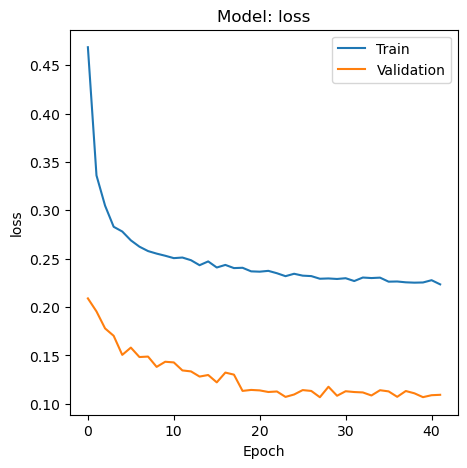

In [130]:
#Loss graph of the model
plot(h6,'loss')

**Observation:**
- The performance in training is better the validation.
- The difference(train & validation) became less.
- The loss of validation is less and with reduced oscillations.



**Model 6: diffrent weight intilisations and with other changes**

In [133]:
#clearing previous keras session
cls()

In [134]:
#building NN model sequentially 
M6= Sequential()
M6.add(Input(shape=(x_over.shape[1],)))
M6.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
M6.add(BatchNormalization())
M6.add(Dropout(0.5))
M6.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
M6.add(BatchNormalization())
M6.add(Dropout(0.25))
M6.add(Dense(16,activation='relu',kernel_initializer='he_uniform'))
M6.add(BatchNormalization())
M6.add(Dropout(0.2))
M6.add(Dense(1,activation='sigmoid',kernel_initializer='he_uniform'))


In [135]:
M6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,697 (22.25 KB)

 Trainable params: 5,473 (21.38 KB)

 Non-trainable params: 224 (896.00 B)

In [136]:
#Optimizer as Adam
Op6=kr.optimizers.Adam()
M6.compile(loss='binary_crossentropy',optimizer=Op6)

In [137]:
#Fitting the model with 72 batches and 50 epochs
st=time.time()
h7=M6.fit(x_over,y_over,validation_data=(x_val,y_val),batch_size=72,epochs=50)
en=time.time()

Epoch 1/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5374 - val_loss: 0.1538
Epoch 2/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2684 - val_loss: 0.1174
Epoch 3/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2286 - val_loss: 0.1036
Epoch 4/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2103 - val_loss: 0.0952
Epoch 5/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1977 - val_loss: 0.0876
Epoch 6/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1910 - val_loss: 0.0858
Epoch 7/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1814 - val_loss: 0.0791
Epoch 8/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1804 - val_loss: 0.0765
Epoch 9/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1679 - val_loss: 0.0775
Epoch 10/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1670 - val_loss: 0.0767
Epoch 11/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1610 - val_loss: 0.0707
Epoch 12/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [138]:
print('time taken',en-st)

time taken 98.10649943351746


In [139]:
#model Evaluation on training data 
M6tr=mod_eval(M6,x_over,y_over)
M6tr

886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,precision,recall,f1_score
0,0.964603,0.997205,0.931818,0.963404


In [140]:
#model evaluation on test data
M6ts=mod_eval(M6,x_val,y_val)
M6ts

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,precision,recall,f1_score
0,0.9916,0.957364,0.888489,0.921642


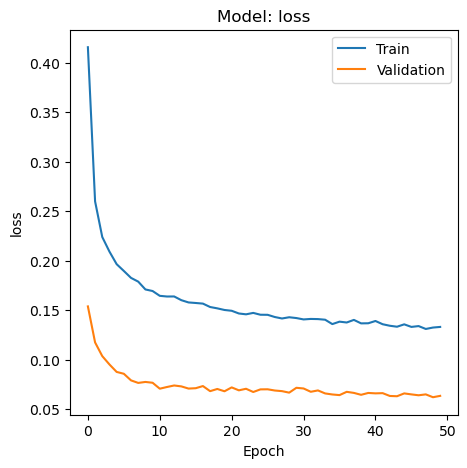

In [141]:
#Loss graph of the model
plot(h7,'loss')

**Observations:**
- The performance in both train and validation became comparable with training scrores better than validation.
- The loss in validation is less and with reduced oscilations.

**Model 7 - Combinations**

In [144]:
#clearing previous keras session
cls()

In [145]:
#building NN model sequentially 
M7= Sequential()
M7.add(Input(shape=(x_over.shape[1],)))
M7.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))  
M7.add(BatchNormalization())
M7.add(Dropout(0.5))
M7.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
M7.add(BatchNormalization())
M7.add(Dropout(0.5))
M7.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
M7.add(BatchNormalization())
M7.add(Dropout(0.5))
M7.add(Dense(64, activation='sigmoid', kernel_initializer='glorot_uniform'))
M7.add(BatchNormalization())
M7.add(Dropout(0.5))
M7.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

In [146]:
M7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          10,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,633 (178.25 KB)

 Trainable params: 44,609 (174.25 KB)

 Non-trainable params: 1,024 (4.00 KB)

In [147]:
Op7=kr.optimizers.Adam()
M7.compile(loss='binary_crossentropy',optimizer=Op7)

In [148]:
st=time.time()
h8=M7.fit(x_over,y_over,validation_data=(x_val,y_val),batch_size=64,epochs=75)
en=time.time()

Epoch 1/75
443/443 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.5439 - val_loss: 0.0973
Epoch 2/75
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2583 - val_loss: 0.0762
Epoch 3/75
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2135 - val_loss: 0.0713
Epoch 4/75
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1956 - val_loss: 0.0662
Epoch 5/75
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1808 - val_loss: 0.0592
Epoch 6/75
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1677 - val_loss: 0.0580
Epoch 7/75
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1680 - val_loss: 0.0586
Epoch 8/75
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1606 - val_loss: 0.0597
Epoch 9/75
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1583 - val_loss: 0.0614
Epoch 10/75
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1502 - val_loss: 0.0619
Epoch 11/75
443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1475 - val_loss: 0.0590
Epoch 12/75
443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step

In [149]:
print('time taken:',en-st)

time taken: 205.38266730308533


In [150]:
M7tr=mod_eval(M7,x_over,y_over)
M7tr

886/886 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


,Accuracy,precision,recall,f1_score
0,0.973744,0.998737,0.948687,0.973069


In [151]:
M7ts=mod_eval(M7,x_val,y_val)
M7ts

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,precision,recall,f1_score
0,0.9916,0.950382,0.895683,0.922222


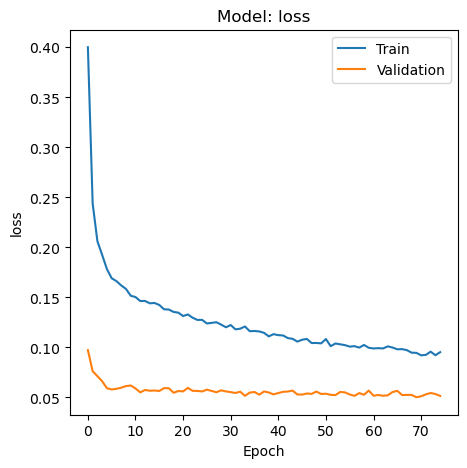

In [152]:
plot(h8,'loss')

**Observations**
- The scores of this and previous model shows a slight improvement compared to earlier iterations.
- The difference between training and validation scores has significantly reduced, indicating better generalization.
- The loss curve is now more stable with fewer oscillations, suggesting improved convergence during training.


### The model Comparison on Training Set

In [155]:
eva_tr=pd.concat([M0tr,M1tr,M2tr,M3tr,M4tr,M5tr,M6tr,M7tr],axis=0)
eva_tr.index=['NeuralNetwork(unsampled,SGD)','NeuralNetwork(over sampled,SGD)','NeuralNetwork(over sampled,SGD,momentum=0.9)',
              'NeuralNetwork(over sampled,Adam,Tanh(activation))','NeuralNetwork(over sampled,Adam,BatchNormalisation,LR=0.001)',
              'NeuralNetwork(over sampled,Adam,BatchNormalisation,Dropout=[0.6,0.4,0.2])',
              'NeuralNetwork(over sampled,Adam,BatchNormalisation,Dropout=[0.5,0.25,0.2]),Weight_init=He_uniform',
              'NeuralNetwork(over sampled,Adam,BatchNormalisation,Dropout=[0.5,0.5,0.5,0.5]),Weight_init=[He_uniform,glorot_uniform]']
eva_tr['epochs']=[24,24,32,32,32,42,50,75]
eva_tr['Batch_size']=[64,64,32,64,72,72,72,64]
eva_tr['Model_Num']=[0,1,2,3,4,5,6,7]
print('The model Comparison on Training Set')
print("**"*75)
eva_tr

The model Comparison on Training Set
******************************************************************************************************************************************************


,Accuracy,precision,recall,f1_score,epochs,Batch_size,Model_Num
"NeuralNetwork(unsampled,SGD)",0.987467,0.961318,0.806490,0.877124,24,64,0
"NeuralNetwork(over sampled,SGD)",0.958216,0.987241,0.928430,0.956933,24,64,1
"NeuralNetwork(over sampled,SGD,momentum=0.9)",0.964533,0.977509,0.950946,0.964044,32,32,2
"NeuralNetwork(over sampled,Adam,Tanh(activation))",0.965168,0.991425,0.938453,0.964212,32,64,3
"NeuralNetwork(over sampled,Adam,BatchNormalisation,LR=0.001)",0.989695,0.988454,0.990966,0.989708,32,72,4
"NeuralNetwork(over sampled,Adam,BatchNormalisation,Dropout=[0.6,0.4,0.2])",0.952216,0.989383,0.914243,0.950330,42,72,5
"NeuralNetwork(over sampled,Adam,BatchNormalisation,Dropout=[0.5,0.25,0.2]),Weight_init=He_uniform",0.964603,0.997205,0.931818,0.963404,50,72,6
"NeuralNetwork(over sampled,Adam,BatchNormalisation,Dropout=[0.5,0.5,0.5,0.5]),Weight_init=[He_uniform,glorot_uniform]",0.973744,0.998737,0.948687,0.973069,75,64,7


### The model Comparison on Validation Set

In [157]:
eva_val=pd.concat([M0te,M1ts,M2ts,M3ts,M4ts,M5ts,M6ts,M7ts],axis=0)
eva_val.index=['NeuralNetwork(unsampled,SGD)','NeuralNetwork(over sampled,SGD)','NeuralNetwork(over sampled,SGD,momentum=0.9)',
              'NeuralNetwork(over sampled,Adam,Tanh(activation))','NeuralNetwork(over sampled,Adam,BatchNormalisation,LR=0.001)',
              'NeuralNetwork(over sampled,Adam,BatchNormalisation,Dropout=[0.6,0.4,0.2])',
              'NeuralNetwork(over sampled,Adam,BatchNormalisation,Dropout=[0.5,0.25,0.2]),Weight_init=He_uniform',
              'NeuralNetwork(over sampled,Adam,BatchNormalisation,Dropout=[0.5,0.5,0.5,0.5]),Weight_init=[He_uniform,glorot_uniform]']
eva_val['epochs']=[24,24,32,32,32,42,50,75]
eva_val['Batch_size']=[64,64,32,64,72,72,72,64]
eva_val['Model_Num']=[0,1,2,3,4,5,6,7]
print('The model Comparison on Validation Set')
print("**"*75)
eva_val

The model Comparison on Validation Set
******************************************************************************************************************************************************


,Accuracy,precision,recall,f1_score,epochs,Batch_size,Model_Num
"NeuralNetwork(unsampled,SGD)",0.9852,0.943478,0.780576,0.854331,24,64,0
"NeuralNetwork(over sampled,SGD)",0.9816,0.812081,0.870504,0.840278,24,64,1
"NeuralNetwork(over sampled,SGD,momentum=0.9)",0.9720,0.693820,0.888489,0.779180,32,32,2
"NeuralNetwork(over sampled,Adam,Tanh(activation))",0.9836,0.840278,0.870504,0.855124,32,64,3
"NeuralNetwork(over sampled,Adam,BatchNormalisation,LR=0.001)",0.9760,0.739394,0.877698,0.802632,32,72,4
"NeuralNetwork(over sampled,Adam,BatchNormalisation,Dropout=[0.6,0.4,0.2])",0.9822,0.822526,0.866906,0.844133,42,72,5
"NeuralNetwork(over sampled,Adam,BatchNormalisation,Dropout=[0.5,0.25,0.2]),Weight_init=He_uniform",0.9916,0.957364,0.888489,0.921642,50,72,6
"NeuralNetwork(over sampled,Adam,BatchNormalisation,Dropout=[0.5,0.5,0.5,0.5]),Weight_init=[He_uniform,glorot_uniform]",0.9916,0.950382,0.895683,0.922222,75,64,7


## The Best model for the checking test performance
- The best Model is the **model_num:7** with better recall value and better generalisation abilities.

## **Model 7 : combination (best model)**

In [160]:
Best_model_metrics=pd.concat([M7tr.T,M7ts.T,mod_eval(M7,x_test,y_test).T],axis=1)
Best_model_metrics.columns=["Training","Validation","Testing"]
Best_model_metrics

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Training,Validation,Testing
Accuracy,0.973744,0.991600,0.989800
precision,0.998737,0.950382,0.939163
recall,0.948687,0.895683,0.875887
f1_score,0.973069,0.922222,0.906422


In [161]:
M7_pred_yTrain=M7.predict(x_over)
M7_pred_yval=M7.predict(x_val)
M7_pred_ytest=M7.predict(x_test)

886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [162]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,M7.predict(x_train)>0.5)
print(cr)

Classification Report - Train data

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14168
           1       0.98      0.93      0.95       832

    accuracy                           0.99     15000
   macro avg       0.99      0.96      0.97     15000
weighted avg       0.99      0.99      0.99     15000



In [163]:
print("Classification Report - validation data",end="\n\n")
cr = classification_report(y_val,M7_pred_yval>0.5)
print(cr)

Classification Report - validation data

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4722
           1       0.95      0.90      0.92       278

    accuracy                           0.99      5000
   macro avg       0.97      0.95      0.96      5000
weighted avg       0.99      0.99      0.99      5000



In [164]:
print("Classification Report - test data",end="\n\n")
cr = classification_report(y_test,M7_pred_ytest>0.5)
print(cr)

Classification Report - test data

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4718
           1       0.94      0.88      0.91       282

    accuracy                           0.99      5000
   macro avg       0.97      0.94      0.95      5000
weighted avg       0.99      0.99      0.99      5000



### Best Model Performance and Recall-based Observations

**Training Data Observations**

- The model performs well on the training data with **high recall (94%)** for failures (class 1), ensuring that most failures are correctly identified. 
- **Precision (99%)** remains high, indicating that the model is confident in its failure predictions, though there may be some **False Positives**.
- From the classification report, the accuracy is **99%**, and the weighted average F1-score is also **99%**, confirming the model’s strong ability to generalize on training data.

**Validation Data Observations**

- On the validation data, recall for class 1 is **89%**, which shows a slight drop compared to training but still indicates strong failure detection.
- **Precision (95%)** is slightly lower than in training, suggesting an increase in **False Positives**, but the model's strong recall continues to prioritize failure detection over reducing inspections.
- The classification report shows **99% accuracy**, with a weighted F1-score of **99%**, and a slight balance shift between recall and precision, reflecting generalization with minor overfitting tendencies.

**Testing Data Observations**

- The recall for failures on the test data is **88%**, which is slightly lower than both the training and validation sets, indicating that the model's failure detection is slightly reduced on unseen data.
- **Precision (94%)** also decreases, but this tradeoff ensures that the model still minimizes the risk of **False Negatives**, albeit at the cost of more inspections.
- From the classification report, the accuracy is **99%**, and the weighted F1-score is **99%**, indicating that the model performs well on unseen data, though recall is slightly reduced.
**Key Inference in model evaluation:**
- While The model evaluation of train data is bit higher still model evaluation on validation and testing data are similar or comparable which shows better generalization. 
**Key Inferences from Classification Reports**
1. The high **accuracy (99%)** across all datasets reflects strong model performance, although the accuracy metric is influenced by the class imbalance and should be considered alongside recall and precision.
3. **Macro averages** (precision, recall, and F1-score) are slightly lower than the weighted averages, highlighting the model's prioritization of the minority class (failures).
4. The model strikes a balance between **sensitivity (recall)** and **confidence (precision)**, with a focus on minimizing **False Negatives** to avoid missed failures while tolerating a moderate increase in **False Positives**.



# **Key Insights and Recommendations**

1. **Best Model Based on Recall**: Model M7 was selected for its high recall (88% on test data), effectively minimizing False Negatives. This reduces replacement costs by ensuring most failures are detected, at the cost of slightly higher inspection rates.  

2. **Trade-off Between Precision and Recall**: The model prioritizes recall over precision, leading to more inspections (False Positives) but significantly lowering the risk of undetected failures. This trade-off aligns with the goal of reducing costly turbine replacements.  

3. **Imbalanced Data Addressed**: Oversampling techniques improved recall by balancing the dataset and making minority class predictions (failures) more reliable. However, acquiring more failure data remains critical for enhancing model robustness.  

4. **Slight Overfitting Observed**: The model exhibits a slightly higher recall on the training set (94%) compared to the test set (88%), suggesting mild overfitting. This is might likely stem from the limited failure data, which restricts the model's ability to generalize perfectly to unseen data. Despite this, techniques such as dropout and batch normalization helped control overfitting, ensuring the model performs well on the test set.  

5. **Need for Additional Failure Data**: Expanding the dataset with more failure cases can address the underlying class imbalance further and reduce dependency on oversampling. This will strengthen the model's predictive power and reliability.  

6. **Collaboration with Domain Experts**: Close collaboration with mechanical and electrical engineers is essential to interpret model outputs effectively, identify critical operational patterns, and align predictions with practical turbine maintenance strategies.  
